In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('seattle-weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['weather_label'] = le.fit_transform(df['weather'])
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather,weather_label
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2
7,2012-01-08,0.0,10.0,2.8,2.0,sun,4
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2


In [ ]:
weather_dict = dict(zip(df['weather_label'], df['weather']))
weather_dict

{0: 'drizzle', 2: 'rain', 4: 'sun', 3: 'snow', 1: 'fog'}

In [ ]:
def date_time(df) :
    
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year #Generate Year Column
    df['month'] = df['date'].dt.month #Generate Month Column
    df['day'] = df['date'].dt.day
    
    return df


df_final = date_time(df)
df_final.head(20)

,date,precipitation,temp_max,temp_min,wind,weather,weather_label,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2,2012,1,5
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2,2012,1,6
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2,2012,1,7
7,2012-01-08,0.0,10.0,2.8,2.0,sun,4,2012,1,8
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2,2012,1,9
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2,2012,1,10


In [ ]:
df_final = df_final.drop(['weather'],axis=1).set_index('date')
df_final

,precipitation,temp_max,temp_min,wind,weather_label,year,month,day
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,0,2012,1,1
2012-01-02,10.9,10.6,2.8,4.5,2,2012,1,2
2012-01-03,0.8,11.7,7.2,2.3,2,2012,1,3
2012-01-04,20.3,12.2,5.6,4.7,2,2012,1,4
2012-01-05,1.3,8.9,2.8,6.1,2,2012,1,5
...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,2,2015,12,27
2015-12-28,1.5,5.0,1.7,1.3,2,2015,12,28
2015-12-29,0.0,7.2,0.6,2.6,1,2015,12,29


Text(0, 0.5, 'Weather Label')

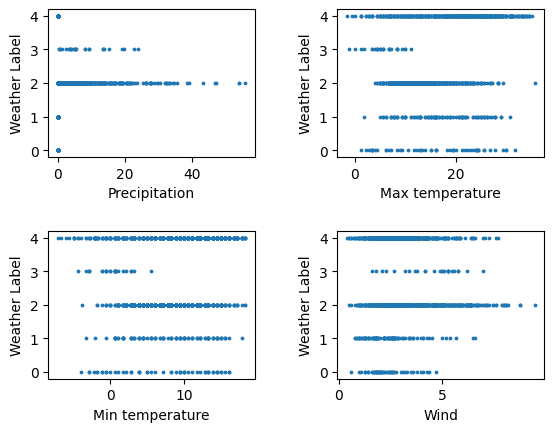

In [39]:
plt.subplots_adjust(wspace=0.4, hspace=0.5)

plt.subplot(2,2,1)
plt.scatter(df_final["precipitation"],df_final["weather_label"],s=3)
plt.xlabel("Precipitation")
plt.ylabel("Weather Label")

plt.subplot(2,2,2)
plt.scatter(df_final["temp_max"],df_final["weather_label"],s=3)
plt.xlabel("Max temperature")
plt.ylabel("Weather Label")

plt.subplot(2,2,3)
plt.scatter(df_final["temp_min"],df_final["weather_label"],s=3)
plt.xlabel("Min temperature")
plt.ylabel("Weather Label")

plt.subplot(2,2,4)
plt.scatter(df_final["wind"],df_final["weather_label"],s=3)
plt.xlabel("Wind")
plt.ylabel("Weather Label")

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

#Preprocess Data for Machine Learning Development
X = df_final.drop(['weather_label'], axis = 1)
y = df_final['weather_label']


over_strategy = {0 : 1000, 1 : 1000, 2 : 1000, 3 : 1000, 4 : 2000}
under_strategy = {0 : 1000, 1 : 1000, 2 : 1000, 3 : 1000, 4 : 2000}

oversample = SMOTE(sampling_strategy = over_strategy)
undersample = RandomUnderSampler(sampling_strategy = under_strategy)

X_final,y = oversample.fit_resample(X,y)
X_final,y = undersample.fit_resample(X_final, y)


X_train,X_test,y_train,y_test = train_test_split(X_final,y,random_state = 10, test_size = 0.2)

/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 0 will be larger than the number of samples in the majority class (class #2 -> 641)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #2 -> 641)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 2 will be larger than the number of samples in the majority class (class #2 -> 641)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 3 will be larger than the number of samples in the majority class (class #2 -> 641)
  warnings.warn(
/usr/local/l

In [38]:
from sklearn.metrics import accuracy_score, classification_report
model = GaussianNB()

np.random.seed(10)
model.fit(X_train,y_train)

pred_all = model.predict(X_final)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(f'Accuracy Score on All Data : {round(accuracy_score(y, pred_all),2)*100}')
print(f'Accuracy Score on Train Data : {round(accuracy_score(y_train, pred_train),2)*100}')
print(f'Accuracy Score on Test Data : {round(accuracy_score(y_test, pred_test),2)*100}')

Accuracy Score on All Data : 74.0
Accuracy Score on Train Data : 74.0
Accuracy Score on Test Data : 72.0


In [ ]:
print(classification_report(y,pred_all))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1000
           1       0.67      0.47      0.55      1000
           2       0.95      0.86      0.90      1000
           3       0.91      0.96      0.94      1000
           4       0.64      0.74      0.68      2000

    accuracy                           0.73      6000
   macro avg       0.75      0.73      0.74      6000
weighted avg       0.74      0.73      0.73      6000

